# Data Description
Welcome to the Datathon! In this competition, you will be working with a rich and diverse dataset consisting of information on famous artists and their artworks, as well as images generated by a text-to-image model. The first part of the dataset is a collection of scraped data from wikigallery.org that provides details on famous painters and their artworks. This data has been augmented with additional information from Wikipedia, offering a comprehensive overview of each artist and their work. The second part of the dataset is a collection of images generated by a state-of-the-art text-to-image model, designed to mimic the artworks in the first dataset. This dataset offers a unique opportunity for participants to explore the intersection of art, culture, and technology, and to gain valuable insights into the world of famous artists and their creations.

Let's start exploring this dataset! In the following cells, you will find information on famous artists and their artworks, as well as images generated by a text-to-image model. Get ready to dive into the data, uncover hidden patterns, trends, and relationships, and gain valuable insights into the world of famous artists and their creations. Good luck!

In [1]:
import pandas as pd

## Data Model
The following Entity-Relation (ER) diagram provides a graphical representation of the structure of the data. It shows the relationships between entities, including Artists, Artworks, and other information, as well as the attributes that describe each entity. By understanding this ER diagram, you will gain a clear understanding of how the data is organized and how entities and attributes are related to one another. This information will be valuable as you begin your analysis and work to uncover meaningful insights from the data.

![Entity-Relationship Schema](https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/Data+model.png)

Understanding the Entity-Relation (ER) diagram is an important step in making sense of the data. In the diagram, entities are represented as rectangles and are named with singular nouns, such as "Artist" or "Artwork." Relationships between entities are represented as arrows. Attributes, which describe the characteristics of entities, are listed inside the rectangles and are named with descriptive adjectives, such as "Name" or "Birthplace."

If you are unfamiliar with ER diagrams, there are many resources available to help you learn. For example, you might find it helpful to read a brief tutorial on ER diagrams, such as the one available at https://www.lucidchart.com/pages/er-diagrams. Additionally, you can find a wide range of articles and tutorials by searching for "ER diagrams" on your preferred search engine. By gaining a solid understanding of ER diagrams, you will be well-equipped to make sense of the data and draw meaningful insights from it.

### Artist
The 'Artist' table is a central component of the dataset and provides information on famous painters and their careers. Each row in the table represents a unique artist and includes the following attributes:

- Id: A unique identifier for each artist.
- Name: The name of the artist.
- Url of wikigallery page: A link to the artist's page on wikigallery.org.
- Picture: A link to an image of the artist.
- Summary: A brief summary of the artist's life and career.
- Birthplace: The birthplace of the artist.
- Deathplace: The place where the artist passed away.
- Birthdate: The date of the artist's birth.
- Deathdate: The date of the artist's death.
- Cause of death: The cause of the artist's death, if available.

Additionally, the "Artist" table is linked to other artists through the concept of apprenticeships. This allows you to explore the relationships between artists and understand how they may have influenced one another.

In [2]:
artists = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Artist.parquet.gzip')
artists.head()

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
pyarrow or fastparquet is required for parquet support

Apprenticeships are an integral part of the artist community and are reflected in the available data. In our dataset, artists can be linked to each other through apprenticeships, providing a glimpse into the relationships and connections between artists. This information can be valuable for researchers, students, and art enthusiasts who are interested in the history and development of different art movements and styles. The availability of this data provides a unique opportunity to gain insights into the relationships and influences that shape the creation of art.

In [3]:
pd.read_csv('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Apprenticeship.csv').head()

,student_id,teacher_id
0,4.0,301.0
1,4.0,577.0
2,6.0,578.0
3,15.0,579.0
4,15.0,580.0


### Artworks
The "Artwork" table provides information on the famous artworks created by the artists in the "Artist" table. Each row in the table represents a unique artwork and includes the following attributes:

- Id: A unique identifier for each artwork.
- Name: The name of the artwork.
- Url: A link to the artwork's page on wikigallery.org.
- Image URL: A link to an image of the artwork.
- Artist ID: A reference to the artist who created the artwork, linking the "Artwork" table to the "Artist" table.
- Rating: A user-generated rating of the artwork, if available.
- Summary: A brief summary of the artwork and its significance.
- Year: The year in which the artwork was created.
- Medium: The medium in which the artwork was created, such as oil on canvas.
- Location: The location where the artwork is currently located or was created, if available.

Additionally, the "Artwork" table is linked to other artworks through the "Recommendation" table, allowing you to explore relationships between artworks and understand how they may be related to one another.

In [4]:
artworks = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Artwork.parquet.gzip')
artworks.sample(5, random_state=12345)

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
pyarrow or fastparquet is required for parquet support

##### Accessing the images
The code that you will use to display images of artworks is designed to pull image data from the "Artwork" table and display it in a visual format. Using the information stored in the "Image URL" attribute, the code will retrieve the image files and display them in a format that is easy to view and interact with. This allows you to quickly and easily explore the artworks in the dataset, view images of them, and gain a better understanding of the data.

The code makes use of image libraries and functions to handle the retrieval and display of the images. These functions are optimized for performance and ease of use, allowing you to easily access and view the images with minimal effort. Whether you're a seasoned developer or a student just starting to work with data, the code for displaying images of artworks is straightforward and accessible, making it a valuable tool for exploring this rich dataset.

Here is an example of how you could display the images of artworks using the Python programming language and the Pillow library:

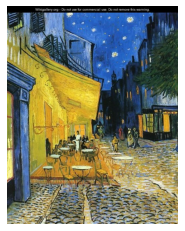

In [5]:
import io
import matplotlib.pyplot as plt
import requests
from PIL import Image

def display_artwork(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

display_artwork(artworks.image_url.values[0])

The code uses the following libraries:

- **io** from the Python Standard Library, which is used to create a binary stream (BytesIO) from binary data.
- **matplotlib.pyplot as plt**, which is used to display the images.
- **requests**, which is used to make HTTP requests to retrieve the image data.
- Image from the **PIL (Pillow) library**, which is used to open and manipulate image data.

### Additional information
In addition to the Artist and Artwork tables, there are several other tables that support the main datasets by providing additional information about related concepts. These concepts include Movement, Academy, and Specialization, each of which has a unique ID, a name, and a description fetched from Wikipedia. The relationships between these concepts and artists are established through separate linking tables, such as ArtistEducation for the Academy, and ArtistMovement for the Movement. These linking tables contain the Artist ID and the Concept ID, allowing us to trace the relationships between artists, their education, and the artistic movements and specializations they were associated with.

##### Specialization

In [6]:
specialization = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Specialization.parquet.gzip')
specialization.head(2)

,id,name,description
0,0,Still Life,A still life (plural: still lifes) is a work o...
1,1,Portraits,"A portrait is a painting, photograph, sculptur..."


In [7]:
pd.read_csv('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/ArtistSpecializations.csv').head(2)

,artist_id,specialty_id
0,0.0,0.0
1,0.0,1.0


##### Movement

In [8]:
movement = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Movement.parquet.gzip')
movement.head(2)

,id,name,description
0,0,Ashcan School,"The Ashcan School, also called the Ash Can Sch..."
1,1,Pre-Raphaelite Brotherhood,The Pre-Raphaelite Brotherhood (later known as...


In [9]:
pd.read_csv('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/ArtistMovements.csv').head(2)

,artist_id,movement_id
0,0.0,43.0
1,1.0,44.0


##### Academy

In [10]:
academy = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Academy.parquet.gzip')
academy.head(2)

,id,name,description
0,0,Royal Academy of Fine Arts Antwerp,The Royal Academy of Fine Arts Antwerp (Dutch:...
1,1,Académie Royale des Beaux-Arts,The Royal Academy of Fine Arts of Brussels (Fr...


In [11]:
pd.read_csv('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/ArtistEducation.csv').head(2)

,artist_id,academy_id
0,0.0,0.0
1,0.0,1.0


##### Medium
In addition to the Movement, Academy, and Specialization tables, there is also a Medium table that stores information about the medium used by the artworks. This table contains the ID, name, and description of each medium. The Artworks table is linked to the Medium table through the Medium ID, allowing you to easily retrieve information about the medium used for a particular artwork. This information can provide insights into the techniques and materials used by artists, further enhancing your understanding of their work.

In [12]:
medium = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Medium.parquet.gzip')
medium.head(2)

,id,name,description
0,0,Oil on canvas,Oil painting is the process of painting with p...
1,1,Oil on panel,Oil painting is the process of painting with p...


##### Artist Pictures
In addition to the artist information, there is also a separate table that contains the images of the artists. This table contains the ID, URL (the location where the image can be retrieved), source_URL (usually a link to the image on wikimedia), and the Wikipedia caption of the image if available. This table provides an additional visual representation of the artists, which can be useful for students when studying the artists and their works.

In [13]:
pictures = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/ArtistPicture.parquet.gzip')
pictures.head(2)

,id,url,source_url,caption
0,0,https://kuleuven-datathon-2023.s3.eu-central-1...,http://upload.wikimedia.org/wikipedia/commons/...,"Self-Portrait, 1887, Art Institute of Chicago"
1,1,https://kuleuven-datathon-2023.s3.eu-central-1...,http://upload.wikimedia.org/wikipedia/commons/...,None


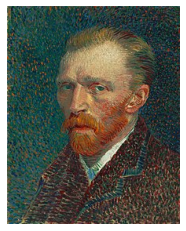

In [14]:
display_artwork(pictures.url.values[0])

##### Places
The places table allows for a hierarchical organization of the birth- and deathplaces of the artists in the Artist table. The attributes in this table include an ID, a Name, and a parent. The parent attribute serves as a link to a place with a higher hierarchy, for example, the city of Amsterdam could have the country 'The Netherlands' as its parent. This hierarchical structure provides a clear and organized representation of the locations related to the artists in the Artist table.

In [15]:
places = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Places.parquet.gzip')
places.head(2)

,id,name,parent
0,0,Zundert,213.0
1,1,Limoges,214.0


In conclusion, this data provides a comprehensive overview of the world of art, including information about artists, artworks, and the concepts and mediums associated with them. With tables for apprenticeships, academies, movements, specializations, and mediums, this data offers a wealth of information to those looking to study the history and context of art. The artist images, artworks, and places tables all contain unique IDs, URLs, descriptions, and additional information that provide valuable context to the data. We encourage you to dive into this data, explore the relationships between artists, artworks, and the various concepts, and see what interesting insights you can uncover. 

### AI-generated images
The second part of the data consists of AI generated images created using a Text-To-Speech model. These images are unique in that they are generated solely based on textual descriptions and provide a creative representation of the subject being described. These images can be used to augment traditional data sources and provide a new and innovative way of visualizing information. In this dataset, these AI generated images are linked to the artworks in the artworks table and provide a visual representation of the artwork described in the text. The Text-To-Speech model used to generate these images has been trained on a large dataset and is capable of creating highly detailed and intricate images. This data is an exciting opportunity to explore the capabilities of AI in the field of image generation and opens up new possibilities for data visualization and analysis.

The table used in the data model to store the information of the AI-generated images contains the following attributes:

- Source Artwork ID: This is a unique identifier linking the generated image to the source artwork it was generated from.
- URL: This is the URL where the generated image can be downloaded.

This table enables the linking of the AI-generated images to the source artworks, and allows easy access to the generated images through the provided URLs.

In [16]:
generated = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Generated.parquet.gzip')
generated.head(5)

,source_artwork,url
0,3148,https://kuleuven-datathon-2023.s3.eu-central-1...
1,1480,https://kuleuven-datathon-2023.s3.eu-central-1...
2,182,https://kuleuven-datathon-2023.s3.eu-central-1...
3,2493,https://kuleuven-datathon-2023.s3.eu-central-1...
4,2497,https://kuleuven-datathon-2023.s3.eu-central-1...


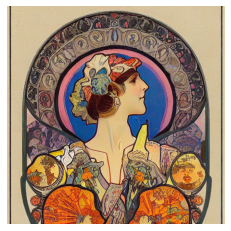

In [17]:
display_artwork(generated.url.values[0])

## Summary
In conclusion, this Jupyter Notebook provides an overview of the data that has been made available for the KU Leuven Datathon 2023. The data consists of several tables including the Artworks, Artist, Movement, Academy, Medium, ArtistPictures, and Places tables. The Artworks table is the main table that contains information on the artworks including the artwork name, artist ID, and image URL. The other tables are linked to the Artworks table through unique IDs and provide additional information on the artists, the movements they belong to, the academies they graduated from, the mediums used in their artworks, and their birth and death places.

The data is available in different formats including CVS files stored in a zip file, parquet.gzip files stored in the same zip file, and online at the URL https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/{file_name}.{file_extension}. The Jupyter Notebook file provides additional information and insights into the data.

Furthermore, there is also a second part of the data consisting of AI-generated images using Text-To-Speech that can be used to train models and generate new artworks. The table used in the data model contains the source artwork that was used to generate the results and the URL to where the generated image can be downloaded.

Overall, this data provides a wealth of information and opportunities for participants to create innovative and exciting models and visualizations. We hope this data will serve as a valuable resource and spark creative ideas.